## Introductory Machine Learning: Assignment 3

**Deadline:**

Assignment 3 is due Thursday, October 14 at 11:59pm. Late work will not be accepted as per the course policies (see the Syllabus and Course policies on [Canvas](https://canvas.yale.edu).

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

You should start early so that you have time to get help if you're stuck. The drop-in office hours schedule can be found on [Canvas](https://canvas.yale.edu).  You can also post questions or start discussions on [Ed Discussion](https://edstem.org/us/courses/9209/discussion/). The problems are broken up into steps that should help you to make steady progress.

**Submission:**

Submit your assignment as a .pdf on Gradescope, and as a .ipynb on Canvas. You can access Gradescope through Canvas on the left-side of the class home page. The problems in each homework assignment are numbered. Note: When submitting on Gradescope, please select the correct pages of your pdf that correspond to each problem. This will allow graders to find your complete solution to each problem.

To produce the .pdf, please do the following in order to preserve the cell structure of the notebook:  
1.  Go to "File" at the top-left of your Jupyter Notebook
2.  Under "Download as", select "HTML (.html)"
3.  After the .html has downloaded, open it and then select "File" and "Print" (note you will not actually be printing)
4.  From the print window, select the option to save as a .pdf

**Topics**
1. Bias-variance decomposition
2. Trees and random forests



### Problem 1. Bias and Variance and Trees, Oh My! (25 points)


In this problem you will explore the bias-variance tradeoff for decision trees using a simple toy regression problem. We start by importing a few packages.



In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
%matplotlib inline

The following cell defines and plots the data for this regression problem. The true regression function is `f`; the response `y` is `f` plus noise. The true function is -1 above the line `x1==x2` and 1 below the line. Just run this cell; do not modify it.

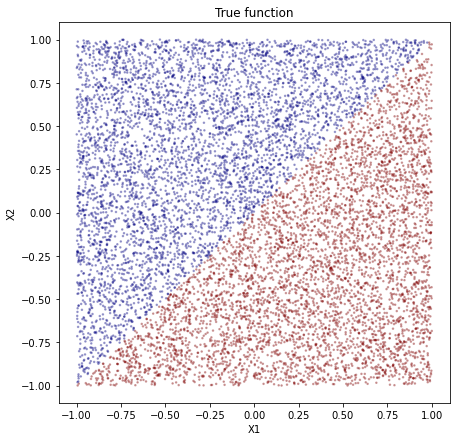

In [2]:
n = 10000
np.random.seed(265)

X = np.random.uniform(low=-1, high=1, size=2*n).reshape(n,2)
f = np.sign(X[:,0] - X[:,1])
y = f + np.random.normal(size=n)

fig = plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c=f, alpha=.3, s=2.5, cmap='jet')
plt.xlabel('X1')
plt.ylabel('X2')
_ = plt.title('True function')

### 1.1 Build regressions trees with different depth

In this problem you are asked to build a sequence of regression trees using this data, to predict `y` from `x1` and `x2`, varying the tree depth. 

* Vary the maximuim tree depth from 1 to 7
* Train each tree on a random set of 500 data points
* Test on the remaining 10000 - 500 data points
* Run 500 trials (train/test splits) for each depth.
* Plot the MSE as a function of the maximum tree depth

The cell below contains some starter code. You may modify this starter code in any way you wish. But be sure to *keep the lines at the end, which plots the mean squared error on the test data versus the depth.*

100%|██████████| 7/7 [00:00<00:00, 6572.67it/s]


Text(0, 0.5, 'MSE')

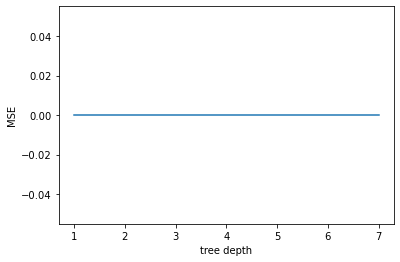

In [3]:
trials = 500
tree_depth = np.arange(1, 8)
test_mean_squared_error = np.zeros(len(tree_depth))

from tqdm import tqdm
for d in tqdm(tree_depth):
    rtree = DecisionTreeRegressor(max_depth=d)
    for trial in np.arange(trials):
        ...

fig = plt.figure()
plt.plot(tree_depth, test_mean_squared_error)
plt.xlabel('tree depth')
plt.ylabel('MSE')

### 1.2 What is the best size of tree?

(a) According to your plot above, what is the best tree depth to choose?

(b) If the regression trees were trained on 5000 data points, rather than 500, how would the choice of tree depth change? Would it increase or decrease? Explain why. Try to answer this question without running any code! If you run an experiment, comment on this in your answer.


[Your answer here in Markdown]



### 1.3 Estimate the squared bias and variance

Now estimate the squared bias and variance of the trees as a function of the maximum depth. This is possible in this case because you know the true function `f`, which was defined above. Use the same setup as above:

* Vary the maximuim tree depth from 1 to 7
* Train each tree on a random set of 500 data points
* Run 500 trials for each train/test split.

To estimate the squared bias and variance, evaluate each of the models on each of the $n=10,000$ data points. You can then estimate the squared bias and variance of the predictions $\hat y_i = \hat f(x_i)$ and take the average 
over all the data points.

Hint: Consider using the fact that the variance of a random variable can be written as $\mbox{Var}(Z) = \mathbb{E}(Z^2) - \mathbb{E}(Z)^2$.  The cell below contains starter code based on this hint. You will need to use the true regression function `f` defined above as a numpy array.

You may modify this starter code in any way you wish. But be sure to *keep the lines at the end, which plots the squared bias and variance.*

100%|██████████| 7/7 [00:00<00:00, 3406.44it/s]


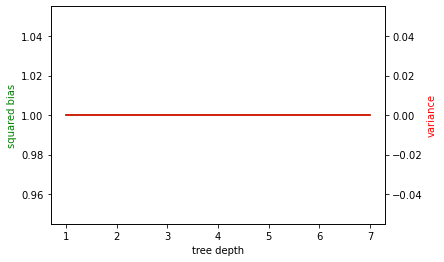

In [4]:
trials = 500
tree_depth = np.arange(1, 8)
bias_squared = []
variance = []

from tqdm import tqdm
for d in tqdm(tree_depth):
    rtree = DecisionTreeRegressor(max_depth=d)
    E_yhat = np.zeros(n)
    E_yhat_squared = np.zeros(n)
    for trial in np.arange(trials):
        ...
        
    # Change the following two lines
    bias_squared.append(np.mean((E_yhat - f)**2))
    variance.append(np.mean(E_yhat_squared - E_yhat**2))
    

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(tree_depth, bias_squared, 'g-')
ax2.plot(tree_depth, variance, 'r-')
ax1.set_xlabel('tree depth')
ax1.set_ylabel('squared bias', color='g')
_ = ax2.set_ylabel('variance', color='r')

### 1.4 Do the bias and variance make sense?

(a) Explain why your plots of the squared bias and variance make sense, and are consistent with your plot of the MSE computed previously.

(b) What is the (approximate) value of the difference between the MSE and the sum of the squared bias and variance for this data set?


[Your answer here in markdown]



### 1.5 Changing the target function

Now, suppose that the true function is changed from a step function on the diagonal to a step function that is along the vertical line `X1=0`. The following line creates this data; do not modify:

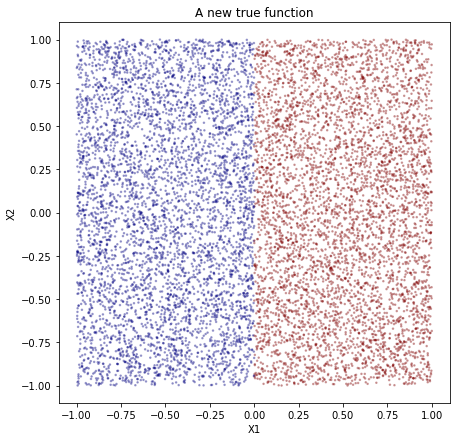

In [5]:
n = 10000
np.random.seed(265)

X = np.random.uniform(low=-1, high=1, size=2*n).reshape(n,2)
f = np.sign(X[:,0])
y = f + np.random.normal(size=n)

fig = plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c=f, alpha=.3, s=2.5, cmap='jet')
plt.xlabel('X1')
plt.ylabel('X2')
_ = plt.title('A new true function')

Now repeat parts 1.1 through 1.4 above using this new target function. 

Try to predict what is going to happen before running any code!
Then, you can simply copy your code above, and paste it below for this new target function. 

In your answers to questions 1.2 and 1.4, comment on *why* the answers are different (or the same) for this new vertical regression function, versus the original along the diagonal.

### Problem 2: Seeing the random forests for the trees (25 points)

This problem is based on the `diabetes` dataset from the `sklearn` package. Please read about the dataset at [https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset). We will predict the response, which is a quantitative measure of diabetes progression one year after baseline, using regression trees and random forests.

The following cell imports the dataset as `diabetes` and names the predictor variables `diabetes_x` and the response `diabetes_y`. Just run this cell, do not modify it.

In [6]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes_x = diabetes.data
diabetes_y = diabetes.target
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

### 2.1 Building a simple regression tree

To start, you will *manually* build a regression tree using only two of the predictor variables: `bmi` and `s5`. To keep things simple, build a tree that has exactly three nodes and four leaves. So, the data is split into two parts initially and then each of those parts is again split one more time. At each node you will need to evaluate each possible splitting point for both `bmi` and `s5` and pick the one that minimizes the RSS.

When you have built the regression tree, create a scatter plot of `s5` versus `bmi`, color-coded by the response variable. In this plot, use vertical and horizontal lines to indicate the regions that your tree splits the data into. You may find the functions `plt.hlines()` and `plt.vlines()` to be useful.

In [ ]:
## -- please write your answer here. -- ## 
# extract the data
bmi = diabetes_x[:,2]
s5 = diabetes_x[:,8]
rss_bmi = []
rss_s5 = []

# we put a wrapper on the np.mean function to avoid warnings from taking the average of an empty list
def average(x):
    if len(x) == 0:
        return(0.0)
    else:
        return(np.mean(x))

# the following starter code finds the best splits for bmi and bp at the root
for i in range(len(bmi)):
    left = np.where(bmi <= bmi[i])[0]
    right = np.where(bmi > bmi[i])[0]
    rss_bmi.append(np.sum((diabetes_y[left] - average(diabetes_y[left]))**2) + 
                   np.sum((diabetes_y[right] - average(diabetes_y[right]))**2))
    left = np.where(s5 <= s5[i])[0]
    right = np.where(s5 > s5[i])[0]
    rss_s5.append(np.sum((diabetes_y[left] - average(diabetes_y[left]))**2) + 
                  np.sum((diabetes_y[right] - average(diabetes_y[right]))**2))
    
best_bmi_cut = np.argmin(rss_bmi)
best_s5_cut = np.argmin(rss_s5)

# You should feel free to rewrite the above code in any way that suits you.
# Now complete the code to make the best split, and then split each child node, 
# and then visualize the tree, showing the four leaf rectangles in the space s5 vs. bmi 


Here is some starter code that you can use to show the four rectangles defined by the leaves. Modify this to use the regions defined by the decision tree above.

In [ ]:
plt.scatter(bmi, s5, c = diabetes_y)
plt.ylabel("BMI", fontsize=14)
plt.xlabel("S5", fontsize=14)
plt.hlines(0, xmin=np.min(bmi), xmax=np.max(bmi), colors='r')
plt.vlines(0, ymin=np.min(s5), ymax=np.max(bmi), colors='r')
plt.show()

### 2.2 Fitting a full regression tree

Now build a tree that uses all the predictor variables, has a more flexible structure, and is validated with a test set. Split the full dataset into a training set and a test set of equal size (50/50). Fit a regression tree to the training set using the function `DecisionTreeRegressor` from `sklearn.tree`. For now, use your best judgment to choose parameters for tree complexity; we will use cross-validation to choose parameters in later parts of this problem set. Some starter code is provided:

In [ ]:
from sklearn import tree

# regr = tree.DecisionTreeRegressor().fit() 
# tree parameters go inside the first set of parentheses and the
# training data goes in the second set of parenthases. Check the 
# documentation for details.



### 2.3 Plotting the tree

Plot your regression tree. To do so, just execute the cell below; no
need to modify it.



In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, filled=True, feature_names=diabetes.feature_names)

### 2.4 Evaluation

Interpret your regression tree. What are some examples of variables that seem to correspond to higher or lower measures of diabetes progression? What is the MSE of the model using the test set? The `.predict` method for your model can help with this.

### 2.5 Using random forests

Finally, we will grow random forests to analyze the data,
using the `RandomForestRegressor` function from `sklearn.ensemble`. Again, please use your best judgment to choose the initial parameters for tree complexity.



In [ ]:
from sklearn import ensemble

# Here is an example of how to use the random forest function in sklearn.ensemble.
# The code below assumes that the training inputs and responses are loaded in the variables train_x and train_y
# and that the test predictor variables are in test_x

# dtr = ensemble.RandomForestRegressor(min_samples_leaf=15, max_features=m)
# regr = dtr.fit(train_x, train_y)
# pred_y = regr.predict(test_x)
# mse = sum(np.square(test_y-pred_y))

## -- please write your answer here. -- ## 


Answer the following questions to compare the performance of random forests to a single regression tree.

1. What test MSE do you obtain, and how does it compare to the test MSE of the regression tree above? 

1. According to the model, which variables are most important in predicting diabetes progression? (The `.feature_importances_` method of the model may help with this.)

1. Plot the MSE of the prediction against $m$, the number of variables considered at each split.

1. Comment on the plot you created and if it makes sense.

In [ ]:
## Write your answers here, using a mix of Markdown and code, as appropriate.
